In [1]:
import pandas as pd
import numpy as np
import krippendorff
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
import json
import csv
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import gmtime, strftime
from pathlib import Path
from datetime import datetime
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.linewidth':0})

In [ ]:
data_path = "data/iwg_hatespeech_public/german hatespeech refugees.csv"
data_df = pd.read_csv(data_path, usecols = [1,2])
reliability_data = data_df.T.to_numpy(dtype = np.dtype('U'))
print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(reliability_data=reliability_data, level_of_measurement = "nominal"))

In [21]:
data_path = "data/telegram_gold/annotated_dataset.txt"
with open(data_path, 'r') as f:
    data_json = json.load(f)
annotation_list = []
gold_np = []
for entry in data_json["messages"]:
    annotation_list.append(entry["raw_annotations"])
    gold_np.append(entry["gold_label"])
    
mapping = {"NEUTRAL" : 0.0, "OFFENSIVE_ABUSIVE": 1.0, np.nan : np.nan}
annotations_np = pd.DataFrame(annotation_list).T.values.tolist()
annotations = []
for i in range(len(annotations_np)):
    annotator = []
    for j in range(len(annotations_np[0])):
        annotator.append(mapping[annotations_np[i][j]])
    annotations.append(annotator)
print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(reliability_data=annotations, level_of_measurement = "nominal"))

gold = []
for i in range(len(gold_np)):
    gold.append(mapping[gold_np[i]])
alphas = []
for annotator in annotations:
    to_compare = [annotator,gold]
    alphas.append(krippendorff.alpha(reliability_data=to_compare, level_of_measurement='nominal'))
alphas = sorted(alphas, reverse=True)
alphas = alphas[:5]

colors = sns.color_palette("Blues")
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.linewidth':0})

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax = sns.barplot(x=list(range(len(alphas))), y=alphas, color=colors[3])
ax.set(xlabel='Annotators', ylabel='Krippendorff\'s alpha')
line = ax.axhline(krippendorff.alpha(reliability_data=annotations,level_of_measurement='nominal'), color='black')

now = datetime.now()
import os
path_fig = "./results/"+"inter-rater_reliability_"+now.strftime("%Y-%m-%d_%H-%M-%S")+"/"
if os.path.exists(path_fig) == False:
        os.makedirs(path_fig)
fig.savefig(path_fig + "inter-rater-reliability.pdf", bbox_inches='tight', dpi=300)
fig.savefig(path_fig + "inter-rater-reliability.png", bbox_inches='tight', dpi=300)
fig.savefig(path_fig + "inter-rater-reliability.eps", bbox_inches='tight', dpi=600)

{'annotator_1': 'NEUTRAL', 'annotator_2': 'NEUTRAL', 'annotator_3': 'NEUTRAL', 'annotator_4': 'NEUTRAL', 'annotator_5': 'NEUTRAL'}
NEUTRAL


SystemExit: 0

/home/markus/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Krippendorff's alpha for nominal metric:  0.9154446546830652


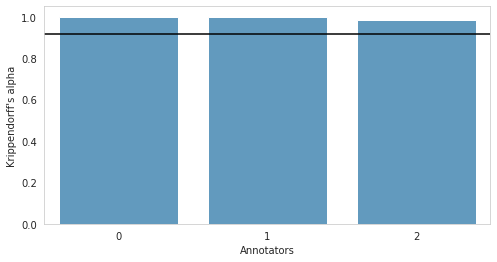

In [2]:
data_path = "data/covid_2021/covid_2021_dataset.csv"
data_df = pd.read_csv(data_path, sep = "\t", header = 0)

annotation_list = []
gold_np = []

for entry in data_df.itertuples():
    entry_dict = {}
    entry_dict["aid1"] = entry.AID1
    entry_dict["aid2"] = entry.AID2
    entry_dict["aid3"] = entry.AID3
    annotation_list.append(entry_dict)
    gold_np.append(entry.label)
mapping = {"not" : 0.0, "indifferent": np.nan, "abusive": 1.0, np.nan : np.nan}
annotations_np = pd.DataFrame(annotation_list).T.values.tolist()
annotations = []
for i in range(len(annotations_np)):
    annotator = []
    for j in range(len(annotations_np[0])):
        try:
            annotator.append(mapping[annotations_np[i][j]])
        except:
            print(annotations_np[i][j])
    annotations.append(annotator)
print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(reliability_data=annotations, level_of_measurement = "nominal"))

gold = []
for i in range(len(gold_np)):
    gold.append(mapping[gold_np[i]])
alphas = []
for annotator in annotations:
    to_compare = [annotator,gold]
    alphas.append(krippendorff.alpha(reliability_data=to_compare, level_of_measurement='nominal'))
alphas = sorted(alphas, reverse=True)

colors = sns.color_palette("Blues")
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.linewidth':0})

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax = sns.barplot(x=list(range(len(alphas))), y=alphas, color=colors[3])
ax.set(xlabel='Annotators', ylabel='Krippendorff\'s alpha')
line = ax.axhline(krippendorff.alpha(reliability_data=annotations,level_of_measurement='nominal'), color='black')

now = datetime.now()
import os
path_fig = "./results/"+"inter-rater_reliability_"+now.strftime("%Y-%m-%d_%H-%M-%S")+"/"
if os.path.exists(path_fig) == False:
        os.makedirs(path_fig)
fig.savefig(path_fig + "inter-rater-reliability.pdf", bbox_inches='tight', dpi=300)
fig.savefig(path_fig + "inter-rater-reliability.png", bbox_inches='tight', dpi=300)
fig.savefig(path_fig + "inter-rater-reliability.eps", bbox_inches='tight', dpi=600)